# NIDS project


In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "darkgrid")
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# This dataset is KD99 dataset and it covers almost all types of network intrusions
train= pd.read_csv('train.txt')
test=pd.read_csv('Test.txt')

In [3]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack","last_flag"] 

In [5]:
len(columns)

43

In [6]:
train.columns = columns
test.columns=columns

In [7]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [9]:
# transpose of min max values 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


## In attack_class normal means 0, DOS means 1, PROBE means 2, R2L means 3 and U2R means 4.

In [10]:
train.loc[train.attack=='normal','attack_class']=0

train.loc[(train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') | 
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') | 
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),'attack_class']=1

train.loc[(train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') | 
          (train.attack=='mscan') | (train.attack=='saint'),'attack_class']=2

train.loc[(train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') | 
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') | 
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') | 
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),'attack_class']=3

train.loc[(train.attack=='buffer_overflow') | (train.attack=='loadmodule') | (train.attack=='rootkit') | (train.attack=='perl') | 
          (train.attack=='sqlattack') | (train.attack=='xterm') | (train.attack=='ps'),'attack_class']=4

In [11]:
test.loc[test.attack=='normal','attack_class']=0

test.loc[(test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') | 
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') | 
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),'attack_class']=1

test.loc[(test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') | 
          (test.attack=='mscan') | (test.attack=='saint'),'attack_class']=2

test.loc[(test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') | 
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') | 
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') | 
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),'attack_class']=3

test.loc[(test.attack=='buffer_overflow') | (test.attack=='loadmodule') | (test.attack=='rootkit') | (test.attack=='perl') | 
          (test.attack=='sqlattack') | (test.attack=='xterm') | (test.attack=='ps'),'attack_class']=4

In [12]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1.0


In [13]:
train.shape

(125972, 44)

<AxesSubplot:xlabel='attack_class', ylabel='count'>

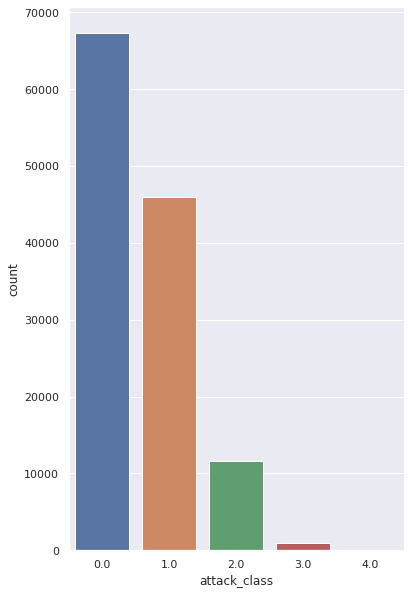

In [14]:
# service distribution
plt.figure(figsize=(6,10))
sns.countplot(x ="attack_class", data=train)

##### Observations:
- The length of time duration of connection for attack is higher than  normal.
- Wrong fragments in the connection is only present in attack.

In [15]:
train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [16]:
numeric_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object', 'O']]

In [17]:
numeric_var_names

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'last_flag',
 'attack_class']

In [18]:
cat_var_names

['protocol_type', 'service', 'flag', 'attack']

In [19]:
train_num=train[numeric_var_names]
test_num=test[numeric_var_names]
train_num.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,1.0
2,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,0.0
3,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,1.0


In [20]:
train_cat=train[cat_var_names]
test_cat=test[cat_var_names]
train_cat.head(5)

,protocol_type,service,flag,attack
0,udp,other,SF,normal
1,tcp,private,S0,neptune
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,neptune


### No missing in train dataset . So , Missing treatment not required .

## dummy variable creation

In [21]:
# function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return(df)

In [22]:
#for c_feature in categorical_features
for c_feature in ['protocol_type', 'service', 'flag', 'attack']:
    train_cat = create_dummies(train_cat,c_feature)
    test_cat = create_dummies(test_cat,c_feature)
train_cat.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
train.shape
train_cat.shape
test_cat.shape

(22543, 112)

## Final file for analysis

In [24]:
train_new = pd.concat([train_num, train_cat], axis=1)
test_new = pd.concat([test_num, test_cat], axis=1)
train_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# correlation matrix (ranges from 1 to -1) # the greater the absolute value of correlation coefficient 
# the stronger are the relationship btw the given features 
corrm=train_new.corr()
corrm

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064219,0.042679,...,-0.000612,-0.004407,0.471677,-0.000637,-0.018990,-0.016149,0.000047,-0.009310,0.013536,-0.001316
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.000044,-0.000300,0.039127,-0.000069,-0.001338,-0.001114,-0.000031,-0.000655,0.004288,-0.000098
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.000016,-0.000197,0.026878,-0.000034,-0.000847,-0.000720,-0.000018,-0.000415,-0.000398,0.012228
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.000079,-0.000563,-0.002174,-0.000126,-0.002428,-0.002064,-0.000056,-0.001190,-0.001188,-0.000178
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072419,-0.001044,...,-0.000504,0.151750,-0.013812,-0.000797,-0.015421,-0.013108,-0.000357,0.985733,-0.007548,-0.001128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attack_smurf,-0.016149,-0.001114,-0.000720,-0.002064,-0.013108,-0.001133,-0.013926,-0.003958,-0.118539,-0.001708,...,-0.000825,-0.005856,-0.022607,-0.001305,-0.025242,1.000000,-0.000584,-0.012370,-0.012356,-0.001846
attack_spy,0.000047,-0.000031,-0.000018,-0.000056,-0.000357,-0.000031,-0.000379,-0.000108,0.000850,-0.000046,...,-0.000022,-0.000159,-0.000615,-0.000036,-0.000687,-0.000584,1.000000,-0.000336,-0.000336,-0.000050
attack_teardrop,-0.009310,-0.000655,-0.000415,-0.001190,0.985733,-0.000653,-0.008029,-0.002282,-0.068341,-0.000985,...,-0.000476,-0.003376,-0.013034,-0.000752,-0.014553,-0.012370,-0.000336,1.000000,-0.007123,-0.001064
attack_warezclient,0.013536,0.004288,-0.000398,-0.001188,-0.007548,-0.000653,0.352671,-0.002279,0.104233,-0.000984,...,-0.000475,-0.003372,-0.013019,-0.000752,-0.014536,-0.012356,-0.000336,-0.007123,1.000000,-0.001063


<AxesSubplot:>

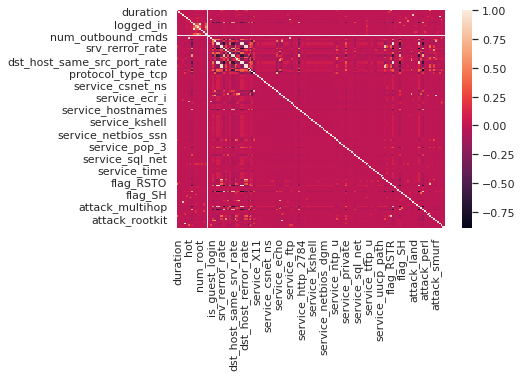

In [26]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(corrm)

## Dropping columns 
    - Based on low variance (near zero variance)
    - High missings (>25% missings)
    - High correlations between two numerical variables

In [27]:
train_new.drop(columns=['land','wrong_fragment','urgent','num_failed_logins',"root_shell","su_attempted","num_root",
                        "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
                        'dst_host_rerror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate',
                        'num_root','num_outbound_cmds','srv_rerror_rate','srv_serror_rate'], axis=1, inplace=True)

In [28]:
train_new.columns


Index(['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in',
       'num_compromised', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       ...
       'attack_phf', 'attack_pod', 'attack_portsweep', 'attack_rootkit',
       'attack_satan', 'attack_smurf', 'attack_spy', 'attack_teardrop',
       'attack_warezclient', 'attack_warezmaster'],
      dtype='object', length=124)

<AxesSubplot:>

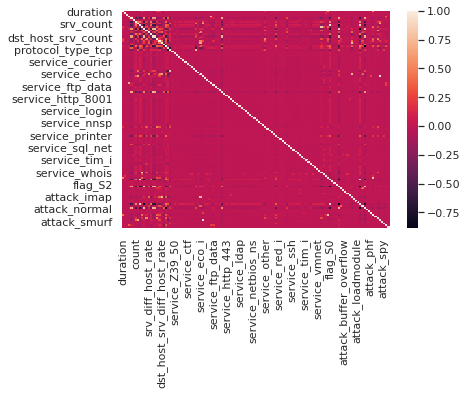

In [29]:
sns.heatmap(train_new.corr())

## Variable reduction using Select K-Best technique

In [30]:
X = train_new[train_new.columns.difference(['attack_class'])]


In [31]:
X_new = SelectKBest(f_classif, k=15).fit(X, train_new['attack_class'] )

/home/mritunjya/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [32]:
X_new.get_support()

array([ True, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [33]:
# capturing the important variables
KBest_features=X.columns[X_new.get_support()]
KBest_features

Index(['attack_buffer_overflow', 'attack_neptune', 'attack_normal',
       'attack_warezclient', 'count', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'flag_S0', 'flag_SF',
       'last_flag', 'logged_in', 'same_srv_rate', 'serror_rate',
       'service_http'],
      dtype='object')

## Final list of variable selected for the model building using Select KBest

### attack_neptune, attack_normal, attack_satan, count, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_same_srv_rate, dst_host_srv_count, flag_S0, flag_SF, last_flag, logged_in, same_srv_rate, serror_rate, service_http

In [34]:
train=train_new
test=test_new

## Model building

In [35]:
top_features=['attack_neptune','attack_normal','attack_satan','count','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_same_srv_rate','dst_host_srv_count','flag_S0','flag_SF','last_flag','logged_in','same_srv_rate','serror_rate','service_http']
X_train = train[top_features]
y_train = train['attack_class']
X_test = test[top_features]
y_test = test['attack_class']

## Decision tree using libraries 

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
clf = DecisionTreeClassifier( max_depth = 8)
clf = clf.fit( X_train, y_train )

In [38]:
y_pred=clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 1.])

In [39]:
accuracy = clf.score(X_test, y_test)

In [40]:
accuracy

0.8784988688284612

# 87.85% accuracy with already implemented decision tree library


## Decision tree implementation from scratch 

In [41]:
pd_td = pd.concat([X_train, y_train], axis = 1)
pd_td

,attack_neptune,attack_normal,attack_satan,count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,flag_S0,flag_SF,last_flag,logged_in,same_srv_rate,serror_rate,service_http,attack_class
0,0,1,0,13,0.60,0.88,0.00,1,0,1,15,0,0.08,0.0,0,0.0
1,1,0,0,123,0.05,0.00,0.10,26,1,0,19,0,0.05,1.0,0,1.0
2,0,1,0,5,0.00,0.03,1.00,255,0,1,21,1,1.00,0.2,1,0.0
3,0,1,0,30,0.00,0.00,1.00,255,0,1,21,1,1.00,0.0,1,0.0
4,1,0,0,121,0.07,0.00,0.07,19,0,0,21,0,0.16,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,1,0,0,184,0.06,0.00,0.10,25,1,0,20,0,0.14,1.0,0,1.0
125968,0,1,0,2,0.01,0.01,0.96,244,0,1,21,0,1.00,0.0,0,0.0
125969,0,1,0,1,0.06,0.00,0.12,30,0,1,18,1,1.00,0.0,0,0.0
125970,1,0,0,144,0.05,0.00,0.03,8,1,0,20,0,0.06,1.0,0,1.0


In [42]:
training_data = np.array(pd_td)

In [43]:
training_data

array([[0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 1. , 0. , 1. ],
       [0. , 1. , 0. , ..., 0.2, 1. , 0. ],
       ...,
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 1. , 0. , 1. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ]])

In [44]:
header = ['attack_neptune','attack_normal','attack_satan','count','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_same_srv_rate','dst_host_srv_count','flag_S0','flag_SF','last_flag','logged_in','same_srv_rate','serror_rate','service_http','attack_class']

In [45]:
def unique_vals(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])

In [46]:
len(training_data[0])

16

In [47]:
unique_vals(training_data,15)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [48]:
def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [49]:
class_counts(training_data)


{0.0: 67342, 1.0: 45927, 3.0: 995, 2.0: 11656, 4.0: 52}

In [50]:
def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)

In [51]:
class Question:
    """A Question is used to partition a dataset.

    This class just records a 'column number' and a
    'column value'. The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. 
    """

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

In [52]:
# Let's write a question for a numeric attribute
q = Question(0,1)
q

Is attack_neptune >= 1?

In [53]:
# Let's pick an example from the training set...
example = training_data[0]
# ... and see if it matches the question
q.match(example) # this will be False, since the first value was 0 and our question was if attack_neptune >= 1
#######

False

In [54]:
def partition(rows, question):
    """Partitions a dataset.

    For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

In [55]:
# Let's partition the training data based on whether rows are in correct side of question or in wrong side of 
# question
true_rows, false_rows = partition(training_data, Question(0, 1))
true_rows

[array([1.00e+00, 0.00e+00, 0.00e+00, 1.23e+02, 5.00e-02, 0.00e+00,
        1.00e-01, 2.60e+01, 1.00e+00, 0.00e+00, 1.90e+01, 0.00e+00,
        5.00e-02, 1.00e+00, 0.00e+00, 1.00e+00]),
 array([1.00e+00, 0.00e+00, 0.00e+00, 1.21e+02, 7.00e-02, 0.00e+00,
        7.00e-02, 1.90e+01, 0.00e+00, 0.00e+00, 2.10e+01, 0.00e+00,
        1.60e-01, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([1.00e+00, 0.00e+00, 0.00e+00, 1.66e+02, 5.00e-02, 0.00e+00,
        4.00e-02, 9.00e+00, 1.00e+00, 0.00e+00, 2.10e+01, 0.00e+00,
        5.00e-02, 1.00e+00, 0.00e+00, 1.00e+00]),
 array([1.00e+00, 0.00e+00, 0.00e+00, 1.17e+02, 7.00e-02, 0.00e+00,
        6.00e-02, 1.50e+01, 1.00e+00, 0.00e+00, 2.10e+01, 0.00e+00,
        1.40e-01, 1.00e+00, 0.00e+00, 1.00e+00]),
 array([1.0e+00, 0.0e+00, 0.0e+00, 2.7e+02, 5.0e-02, 0.0e+00, 9.0e-02,
        2.3e+01, 1.0e+00, 0.0e+00, 2.1e+01, 0.0e+00, 9.0e-02, 1.0e+00,
        0.0e+00, 1.0e+00]),
 array([1.00e+00, 0.00e+00, 0.00e+00, 1.33e+02, 6.00e-02, 0.00e+00,
        5.00e-02, 

In [56]:
len(true_rows)

41214

In [57]:
len(false_rows)

84758

## Finding gini impurity

In [58]:
def gini(rows):
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

In [59]:
gini(training_data)
# this has this much amount of impurity

0.5726817724618279

## finding average weightage impurity and then subtracting it from parent node impurity and it will give us the information gain 

In [60]:
def info_gain(left, right, current_uncertainty):
    """Information Gain.

    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

In [61]:
#######
# Demo:
# Calculate the uncertainy of our training data.
current_uncertainty = gini(training_data)
current_uncertainty

0.5726817724618279

In [62]:
# How much information do we gain by partioning on attack_neptune feature value 
true_rows, false_rows = partition(training_data, Question(0, 1))
info_gain(true_rows, false_rows, current_uncertainty)

0.3394819282867037

## Finding which question will be best to ask to reduce the impurity so finding out the best question to ask 

In [63]:
def find_best_split(rows):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our
            # toy dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

In [64]:
#######
# Demo:
# Find the best question to ask first for our toy dataset.
best_gain, best_question = find_best_split(training_data)
best_question
# FYI: is color == Red is just as good. See the note in the code above
# where I used '>='.
#######

Is attack_normal >= 1.0?

In [65]:
best_gain

0.4113800246972348

## Making the leaf node of a tree

In [66]:
class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class-> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)

## Making the node of a tree which can decide which question it holds and what are the true and false branches 

In [67]:
class Decision_Node:
    """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

## Building the tree from recursion 

In [68]:
def build_tree(rows):
    """Builds the tree.

    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # depending on the answer.
    return Decision_Node(question, true_branch, false_branch)

In [69]:
my_tree = build_tree(training_data)

## Classify -> basically predicting the output from input features

In [70]:
def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [71]:
#######
# Demo:
# The tree predicts the 1st row of our
# training data
classify(training_data[0], my_tree)
#######

{0.0: 67342}

In [72]:
def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [73]:
#######
# Demo:
# Printing that a bit nicer
print_leaf(classify(training_data[0], my_tree))
#######

{0.0: '100%'}

## Preparing our testing data to find the accuracy of our model

In [74]:
pd_testd = pd.concat([X_test, y_test], axis = 1)
pd_testd

,attack_neptune,attack_normal,attack_satan,count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,flag_S0,flag_SF,last_flag,logged_in,same_srv_rate,serror_rate,service_http,attack_class
0,1,0,0,136,0.06,0.00,0.00,1,0,0,21,0,0.01,0.0,0,1.0
1,0,1,0,1,0.04,0.61,0.61,86,0,1,21,0,1.00,0.0,0,0.0
2,0,0,0,1,0.00,1.00,1.00,57,0,1,15,0,1.00,0.0,0,2.0
3,0,0,0,1,0.17,0.03,0.31,86,0,0,11,0,1.00,0.0,0,2.0
4,0,1,0,4,0.00,0.01,1.00,255,0,1,21,1,1.00,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,1,0,1,0.06,0.01,0.72,141,0,1,21,1,1.00,0.0,0,0.0
22539,0,1,0,2,0.00,0.01,1.00,255,0,1,21,1,1.00,0.0,1,0.0
22540,0,0,0,5,0.00,0.00,1.00,255,0,1,15,1,1.00,0.0,1,1.0
22541,0,1,0,4,0.01,0.00,0.99,252,0,1,21,0,1.00,0.0,0,0.0


In [75]:
# Evaluate
testing_data = np.array(pd_testd)

In [76]:
for row in testing_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree))))

Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {3.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 2.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0.

Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 1.0.

Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 1.0.

Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 2.0. Predicted: {3.0: '100%'}
Actual: 0.0.

Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 2.0. Predicted: {3.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0. Predicted: {1.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 3.0. Predicted: {1.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0.

Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 3.0. Predicted: {2.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 2.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 1.0.

Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0. Predicted: {2.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 3.0. Predicted: {2.0: '100%'}
Actual: 3.0. Predicted: {2.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0.

Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 2.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 3.0. Predicted: {2.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 3.0. Predicted: {2.0: '100%'}
Actual: 3.0. Predicted: {2.0: '100%'}
Actual: 1.0. Predicted: {1.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 3.0. Predicted: {3.0: '100%'}
Actual: 3.0. Predicted: {1.0: '100%'}
Actual: 0.0. Predicted: {0.0: '100%'}
Actual: 1.0.

In [77]:
def accurate(testing_data):
    true, false = 0 , 0
    for row in testing_data:
        actual = row[-1]
        predictions = classify(row,my_tree)
        best, best_key = 0, 0
        for i in predictions.keys():
            if(predictions[i] > best):
                best = predictions[i]
                best_key = i
        if(best_key == actual):
            true += 1
        else:
            false += 1
    return (true)/(true+false)

In [78]:
accuracy = accurate(testing_data)

In [79]:
accuracy

0.8903872599032959

# 89% accuracy with self made decision-tree 

## So we have successfully made a good NIDS in WBAN with decision tree

## Saving the tree object/Model in a pickle so we dont have to train it again and again 

In [80]:
import pickle 
pickle.dump(my_tree, open('dt.pkl', 'wb'))

In [81]:
# reading from pickle data
model = pickle.load(open('dt.pkl','rb'))

## Performance Metrices 

In [82]:
def performance_metrics(testing_data):
    tp, fp , tn ,fn = 0 , 0 , 0, 0
    true , false = 0 , 0
    for row in testing_data:
        actual = row[-1]
        predictions = classify(row,my_tree)
        best, best_key = 0, 0
        for i in predictions.keys():
            if(predictions[i] > best):
                best = predictions[i]
                best_key = i
        if(best_key == actual):
            if actual == 0.0:
                tn += 1
            else:
                tp += 1
            true += 1
        else:
            if actual == 0.0:
                fp += 1
            else:
                fn += 1
            false += 1
    
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    fpr = fp / (tn + fp)
    fnr = fn / (fn + tp)
    accuracy = true / (true + false)
    precision = tpr / (tpr + fpr)
    return tpr, tnr , fpr , fnr , accuracy ,precision

In [83]:
tpr, tnr , fpr , fnr , accuracy ,precision = performance_metrics(testing_data)

In [84]:
tpr

0.8074345386533666

In [85]:
tnr

1.0

In [86]:
fpr

0.0

In [88]:
fnr

0.1925654613466334

In [89]:
accuracy

0.8903872599032959

In [90]:
precision

1.0

In [91]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Columns: 124 entries, duration to attack_warezmaster
dtypes: float64(10), int64(11), uint8(103)
memory usage: 32.6 MB


In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Columns: 152 entries, duration to attack_xterm
dtypes: float64(16), int64(24), uint8(112)
memory usage: 9.3 MB


In [95]:
testing_percentage = 22543 / (22543 + 125972) *100


In [96]:
testing_percentance

15.17893815439518